# Project 2: EGY FWD Project

In  the project we will apply the steps of the Data Wrangling process: 

** - Gathering Data 

** - Assessing Data 

** - Cleaning Data 

Afterwards, we will go through visualizations and conclusions. 

# First: Gather Data: 

In [1]:
#We import all the needed libraries that can be used in the efforts of gathering, assessing and cleaning data.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
from bs4 import BeautifulSoup as bs
import glob 
import requests
import tweepy

In [2]:
#Gathering Data manually, 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_images = pd.read_csv('image-predictions.tsv') #this works if those files are manually downloaded.

In [3]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
#We can also import the images data programatically as follows, 
folder_name = 'Project_4'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response)
response.content
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
        file.write(response.content)
os.listdir(folder_name)

<Response [200]>


['image-predictions.tsv']

In [5]:
df_images = pd.read_csv('image-predictions.tsv', sep= '\t')
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
df_json = pd.read_json("tweet-json.txt", lines = True)
df_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
#We then make copies of the original 3 tables to perform our next steps on the copies and maintain our original data set as is.

df_archive_copy = df_archive.copy()
df_images_copy = df_images.copy()
df_json_copy = df_json.copy()

# Second: Assess Data: 

### The twitter archive table:

In [8]:
df_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archive_copy.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
df_archive_copy.duplicated().any()

False

In [13]:
df_archive_copy.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Toby            7
Buddy           7
an              7
Daisy           7
Bella           6
Leo             6
Koda            6
Dave            6
Stanley         6
Scout           6
Oscar           6
Rusty           6
Milo            6
Jax             6
Jack            6
Alfie           5
             ... 
Banjo           1
Mark            1
Brandi          1
Superpup        1
Hall            1
Bruiser         1
Vinnie          1
Pete            1
Schnitzel       1
incredibly      1
Snickers        1
Ike             1
Samsom          1
Venti           1
Miguel          1
Vince           1
Edd             1
Hector          1
Alexander       1
Shnuggles       1
Nigel           1
Mabel           1
Todo            1
Derby           1
Jebberson 

In [14]:
df_archive_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
len(df_archive_copy.query('rating_denominator != "10"'))

23

In [16]:
df_archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### The Images table: 

In [17]:
df_images_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_images_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_images_copy.duplicated().any()

False

### The Json table: 

In [21]:
df_json_copy

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [22]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

# Tidiness Issues: 

### The Archive table:

** The dog stage columns need to be combined into one column indicating the stage of the dog. (One variable)

### ALL tables:

** The 3 tables(archive, images and json data tables) should be combined into one dataframe

# Third: Clean Data: 

### Archive table: 

**Many irrelevent data**

### Code: 

In [23]:
df_archive_copy.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Toby            7
Buddy           7
an              7
Daisy           7
Bella           6
Leo             6
Koda            6
Dave            6
Stanley         6
Scout           6
Oscar           6
Rusty           6
Milo            6
Jax             6
Jack            6
Alfie           5
             ... 
Banjo           1
Mark            1
Brandi          1
Superpup        1
Hall            1
Bruiser         1
Vinnie          1
Pete            1
Schnitzel       1
incredibly      1
Snickers        1
Ike             1
Samsom          1
Venti           1
Miguel          1
Vince           1
Edd             1
Hector          1
Alexander       1
Shnuggles       1
Nigel           1
Mabel           1
Todo            1
Derby           1
Jebberson 

In [24]:
df_archive_copy.name.str.islower()
drop_names = df_archive_copy.loc[df_archive_copy.name.str.islower()]
indices = drop_names.index
df_archive_copy.drop(df_archive_copy.index[indices], inplace=True)

### Test:

In [25]:
df_archive_copy.name.value_counts()

None         745
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
Daisy          7
Toby           7
Buddy          7
Bailey         7
Koda           6
Bella          6
Scout          6
Leo            6
Dave           6
Rusty          6
Stanley        6
Jack           6
Jax            6
Milo           6
Oscar          6
Larry          5
Finn           5
Alfie          5
Louis          5
            ... 
Mark           1
Brandi         1
Superpup       1
Hall           1
Daniel         1
Tedders        1
Vinnie         1
Mojo           1
Baron          1
Snickers       1
Berb           1
Ike            1
Joey           1
Venti          1
Samsom         1
Storkson       1
Juckson        1
Edd            1
Hector         1
Al             1
Shnuggles      1
Sparky         1
Mabel          1
Todo           1
Banjo          1
Jebberson      1
Gustav         1
Caryl         

**Many retweets are recorded here that need to be removed because we need to keep only original tweets to be recorded and analyzed.**

### Define:

Find the retweets through the retweeted_status_id_column then drop them and finally drop the empty columns concerned with the retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

### Code:

In [26]:
df_archive_copy.retweeted_status_id.count()

176

In [27]:
df_archive_copy.drop(df_archive_copy.loc[df_archive_copy.retweeted_status_id > 0].index, inplace=True)

In [28]:
df_archive_copy.retweeted_status_id.count()

0

In [29]:
df_archive_copy.drop('retweeted_status_id', axis=1, inplace= True)
df_archive_copy.drop('retweeted_status_user_id', axis=1, inplace= True)
df_archive_copy.drop('retweeted_status_timestamp', axis=1, inplace= True)

### Test:

In [30]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2071 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2071 non-null object
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2013 non-null object
rating_numerator         2071 non-null int64
rating_denominator       2071 non-null int64
name                     2071 non-null object
doggo                    2071 non-null object
floofer                  2071 non-null object
pupper                   2071 non-null object
puppo                    2071 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 242.7+ KB


**timestamp isn't datetime data type.**

### Define:

Use the to_datetime function to change the timestamp type into datetime.

### Code:

In [31]:
df_archive_copy['timestamp']= pd.to_datetime(df_archive_copy['timestamp']) 

### Test:

In [32]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2071 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2071 non-null datetime64[ns]
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2013 non-null object
rating_numerator         2071 non-null int64
rating_denominator       2071 non-null int64
name                     2071 non-null object
doggo                    2071 non-null object
floofer                  2071 non-null object
pupper                   2071 non-null object
puppo                    2071 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 242.7+ KB


**Around 96% of the records are missing in the in_reply_to_status_id, in_reply_to_user_id columns, thus they are unreliable for analysis --> need to be dropped.** 


### Define:

Use the drop function to drop the mentioned columns above. 

### Code:

In [33]:
df_archive_copy.drop('in_reply_to_status_id', axis=1, inplace= True)
df_archive_copy.drop('in_reply_to_user_id', axis=1, inplace= True)

### Test:

In [34]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.3+ KB


**The different dog stage columns have many NAN values.
This issue will be solved through solving Tidiness Issue No.1 and melting all dog stages into one column because these different dog stage columns represent One variable in the end.**

**The rating_numerator and denominator columns should be floats.**

### Define:

Use the astype function to change the data type of the mentioned columns.

### Code: 

In [35]:
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype(float)
df_archive_copy.rating_denominator = df_archive_copy.rating_denominator.astype(float)

### Test:

In [36]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


**Some rating numerator values are incorrect and should be extracted correctly from the tweet text**

### Define:

Using extract function to extract the correct rating numerators from the tweet texts, then using the update function to update the archive table with the new values extracted.

### Code:

In [37]:
print(df_archive_copy.rating_denominator.value_counts())
print(df_archive_copy.rating_numerator.value_counts())

10.0     2052
80.0        2
50.0        2
20.0        2
11.0        2
150.0       1
110.0       1
90.0        1
70.0        1
130.0       1
120.0       1
16.0        1
40.0        1
7.0         1
15.0        1
0.0         1
Name: rating_denominator, dtype: int64
12.0      485
10.0      419
11.0      410
13.0      300
9.0       142
8.0        91
7.0        48
14.0       39
5.0        35
6.0        30
3.0        18
4.0        14
2.0         7
1.0         7
420.0       2
0.0         2
1776.0      1
121.0       1
182.0       1
165.0       1
17.0        1
75.0        1
45.0        1
666.0       1
15.0        1
960.0       1
84.0        1
26.0        1
24.0        1
27.0        1
88.0        1
144.0       1
99.0        1
50.0        1
80.0        1
44.0        1
20.0        1
143.0       1
Name: rating_numerator, dtype: int64


In [38]:
#We then extract the correct rating_numerators and denominators from the tweet texts as follows, 
rating = df_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand= True)
rating.columns = ['rating_numerator','rating_denominator']
rating

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [39]:
#We make sure all the numerator and denominator data types are stored as floats, then we update the old archive table 
#with the new numerator and denominator values extracted from the tweets.
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype(float)
df_archive_copy.rating_denominator = df_archive_copy.rating_denominator.astype(float)
rating.rating_numerator = rating.rating_numerator.astype(float)
rating.rating_denominator = rating.rating_denominator.astype(float)

df_archive_copy.update(rating)

In [40]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [41]:
#We then compute the rating values
df_archive_copy['ratings']= df_archive_copy['rating_numerator'] / df_archive_copy['rating_denominator']

In [42]:
df_archive_copy.head(11)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,1.4


### Test:

In [43]:
#As seen below the rating numerator and denominators are stored as floats
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
ratings               2071 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 226.5+ KB


In [44]:
#As seen here the first row with the dog name Bella which had a wrong rating_numerator previously as 5 is now stored right as 13.5
#Why do we have 6 records for Bella --> because we have 6 different dogs with the name Bella having different tweet_ids
#This can be checked through checking the value counts of dog names performed previously in the first quality issue in the archive table.
df_archive_copy.query('name == "Bella"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,None,None,None,None,1.35
60,880465832366813184,2017-06-29 16:39:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12.0,10.0,Bella,None,None,None,None,1.20
1089,737800304142471168,2016-06-01 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,https://twitter.com/dog_rates/status/737800304...,10.0,10.0,Bella,None,None,None,None,1.00
1354,703631701117943808,2016-02-27 17:24:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,https://twitter.com/dog_rates/status/703631701...,11.0,10.0,Bella,None,None,None,None,1.10
1768,678389028614488064,2015-12-20 01:38:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,https://twitter.com/dog_rates/status/678389028...,11.0,10.0,Bella,None,None,pupper,None,1.10
1964,673350198937153538,2015-12-06 03:56:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,https://twitter.com/dog_rates/status/673350198...,9.0,10.0,Bella,None,None,None,None,0.90


**The tweet_id should be object instead of integer.**

### Define:

Use the astype function to change the data type of the mentioned above columns. 

### Code:

In [45]:
df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype(object)

### Test:

In [46]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
ratings               2071 non-null float64
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 226.5+ KB


## Images table:

**Mixed status of the dog breed names (lowercase or uppercase) --> need to be unified into lower case names**

### Define: 

Use the lower() function to convert the dog breed names into lower cases. 

### Code:

In [47]:
df_images_copy.p1 = df_images_copy.p1.str.lower()
df_images_copy.p2 = df_images_copy.p2.str.lower()
df_images_copy.p3 = df_images_copy.p3.str.lower()

### Test:

In [48]:
df_images_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**tweet_id column should be object not integer.**

### Define:

Use the astype function to change the data type of tweet id into integer.

### Code:

In [49]:
df_images_copy.tweet_id = df_images_copy.tweet_id.astype(object)

### Test:

In [50]:
df_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Json table: 

**Many NAN values in the following columns(contributors, coordinates, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, place, quoted_status, quoted_status_id, quoted_status_id_str, retweeted_status)**

### Define:

Use the drop function to drop all the NAN value columns mentioned.

### Code:

In [51]:
df_json_copy.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [52]:
the_list=['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweeted', 'retweeted_status', 'source', 'truncated',
       'user' ]
df_json_copy.drop(columns =the_list, inplace = True)

### Test:

In [53]:
df_json_copy.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [54]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Retweets and Favorite Count: retweet_count and favorite_count should be integers, not floats.**

### Define:

Use the as type function to convert the retweetand favorite counts to integers.

### Code:

In [55]:
df_json_copy.retweet_count = df_json_copy.retweet_count.astype(int)
df_json_copy.favorite_count = df_json_copy.favorite_count.astype(int)

### Test:

In [56]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Id column data type should be object not integer.**

### Define:

Use the astype function to convert the data type of Id column into object.

### Code

In [57]:
df_json_copy.id = df_json_copy.id.astype(object)

### Test:

In [58]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


# Tidiness Issues: 

### The Archive table:

**The dog stage columns need to be combined into one column indicating the stage of the dog. (One variable)**
 

### Define: 

Use different functions like .loc and .drop() to handle all the different dog stages columns and melt them into one column

### Code:

In [59]:
# handle none
df_archive_copy.doggo.replace('None', '', inplace=True)
df_archive_copy.floofer.replace('None', '', inplace=True)
df_archive_copy.pupper.replace('None', '', inplace=True)
df_archive_copy.puppo.replace('None', '', inplace=True)

# merge into column
df_archive_copy['dog_stage'] = df_archive_copy.doggo + df_archive_copy.floofer + df_archive_copy.pupper + df_archive_copy.puppo

# handle multiple stages
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_archive_copy.loc[df_archive_copy.dog_stage == '', 'dog_stage'] = np.nan

#remove the doggo, floofer, pupper, puppo columns from the data set
df_archive_copy.drop('doggo', axis=1, inplace= True)
df_archive_copy.drop('floofer', axis=1, inplace= True)
df_archive_copy.drop('pupper', axis=1, inplace= True)
df_archive_copy.drop('puppo', axis=1, inplace= True)

### Test:

In [60]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 178.0+ KB


### ALL tables:

**The 3 tables(archive, images and json data tables) should be combined into one dataframe**

### Define:

Use the join and merge function to combine all data in one dataframe.

### Code:

In [61]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 178.0+ KB


In [62]:
df_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [63]:
df_images_copy.rename(columns= {'tweet_id':'tweet_id_2'}, inplace= True)

In [64]:
df_images_copy.columns

Index(['tweet_id_2', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [65]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [66]:
df = pd.concat([df_archive_copy,df_images_copy,df_json_copy],join='outer', axis=1)

### Test:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
tweet_id_2            2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf             

In [68]:
# Many columns need to be dropped from the table because they include unneccessary data for our analysis in the 3 tables.

In [69]:
df.drop("id", axis=1, inplace= True)
df.drop("tweet_id_2", axis=1, inplace= True)
df.drop("source", axis=1, inplace= True)
df.drop("jpg_url", axis=1, inplace= True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
favorite_count        2354 non-null float64
retweet_count     

In [71]:
#After combining the 3 tables we need to check for duplicates where it appears here there are no duplicates.
df.duplicated().value_counts()

False    2355
dtype: int64

In [72]:
#We also need to make sure there aren't any null values in our data set before analysis and visualization.
df.dropna(axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
favorite_count        2354 non-null float64
retweet_count     

In [73]:
df.to_csv('twitter_archive_master.csv', index=False)

# Fourth: Data Analysis:

In [74]:
df= pd.read_csv('twitter_archive_master.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 21 columns):
tweet_id              2071 non-null float64
timestamp             2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
favorite_count        2354 non-null float64
retweet_count         235

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 21 columns):
tweet_id              2071 non-null float64
timestamp             2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
ratings               2071 non-null float64
dog_stage             330 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
favorite_count        2354 non-null float64
retweet_count         235

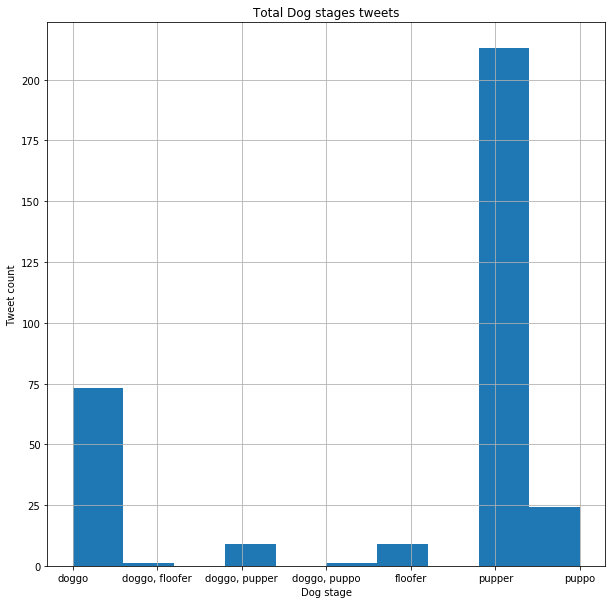

In [77]:
df.dog_stage.hist(figsize=(10,10));
plt.title('Total Dog stages tweets');
plt.xlabel('Dog stage');
plt.ylabel('Tweet count');

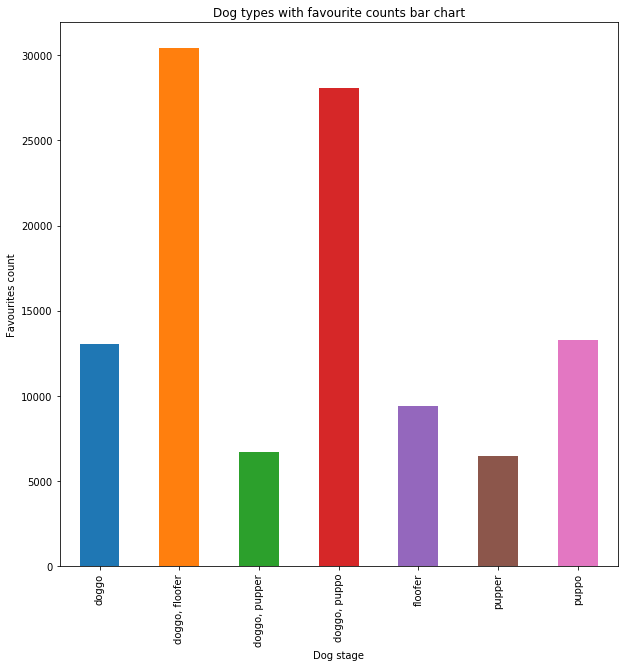

In [78]:
fav_types = df.groupby('dog_stage')['favorite_count'].mean()
fav_types.plot(kind='bar',figsize=(10,10));
plt.title('Dog types with favourite counts bar chart');
plt.xlabel('Dog stage');
plt.ylabel('Favourites count');

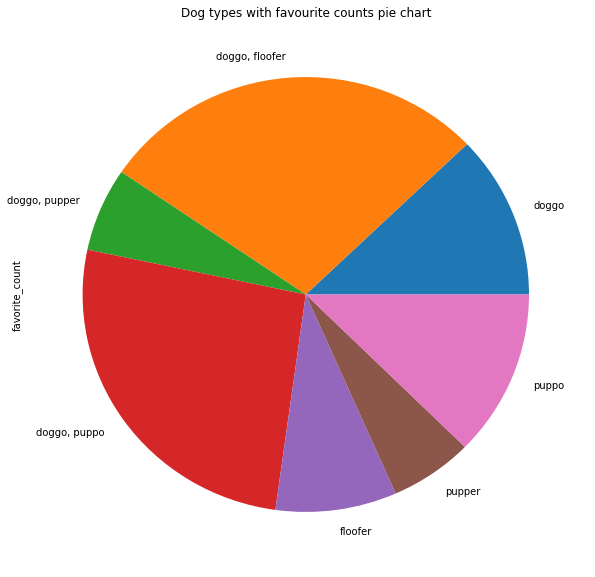

In [79]:
fav_types.plot(kind='pie', figsize=(10,10));
plt.title('Dog types with favourite counts pie chart');

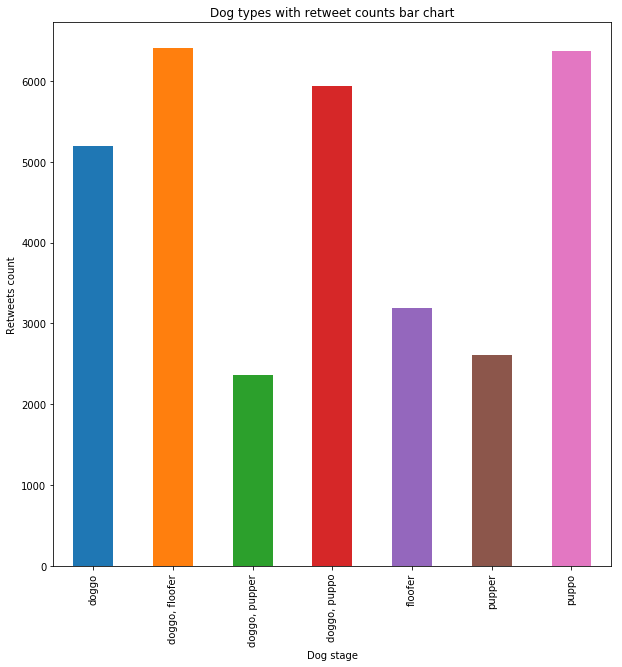

In [80]:
retweet_types = df.groupby('dog_stage')['retweet_count'].mean()
retweet_types.plot(kind='bar',figsize=(10,10));
plt.title('Dog types with retweet counts bar chart');
plt.xlabel('Dog stage');
plt.ylabel('Retweets count');

In [81]:
# We computed the values because the bar chart wasn't clear enough in terms of telling us which dog stage has the highest retweets
df.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo             5192.863014
doggo, floofer    6403.000000
doggo, pupper     2358.444444
doggo, puppo      5943.000000
floofer           3191.111111
pupper            2607.798122
puppo             6370.833333
Name: retweet_count, dtype: float64

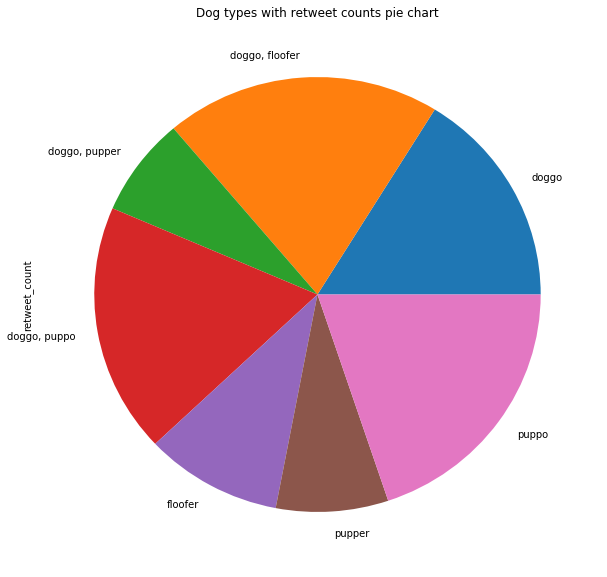

In [82]:
retweet_types.plot(kind='pie',figsize=(10,10));
plt.title('Dog types with retweet counts pie chart');

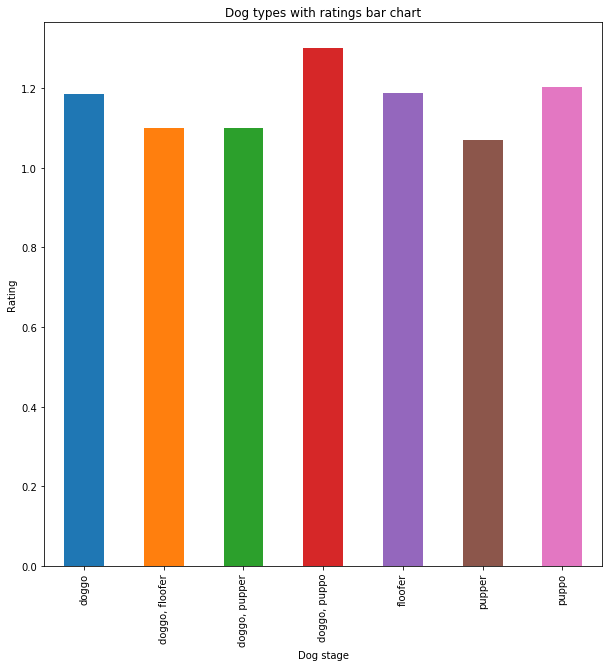

In [83]:
rating_types = df.groupby('dog_stage')['ratings'].mean()
rating_types.plot(kind='bar',figsize=(10,10));
plt.title('Dog types with ratings bar chart');
plt.xlabel('Dog stage');
plt.ylabel('Rating');

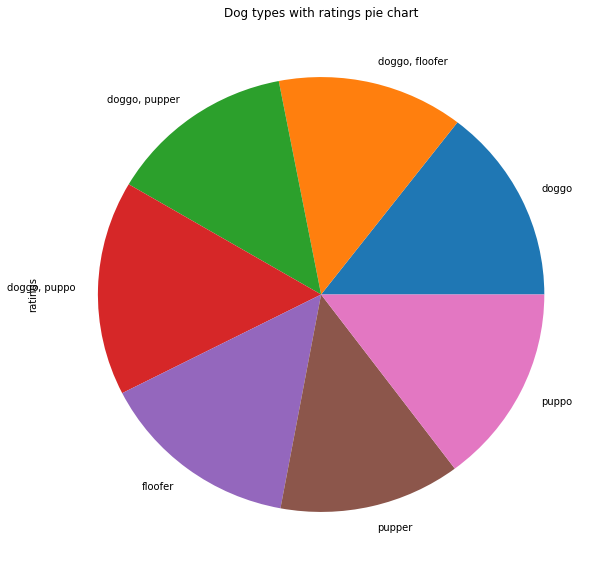

In [84]:
rating_types = df.groupby('dog_stage')['ratings'].mean()
rating_types.plot(kind='pie',figsize=(10,10));
plt.title('Dog types with ratings pie chart');

In [85]:
df.groupby('dog_stage')['ratings'].mean()

dog_stage
doggo             1.184932
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.188889
pupper            1.070549
puppo             1.204167
Name: ratings, dtype: float64

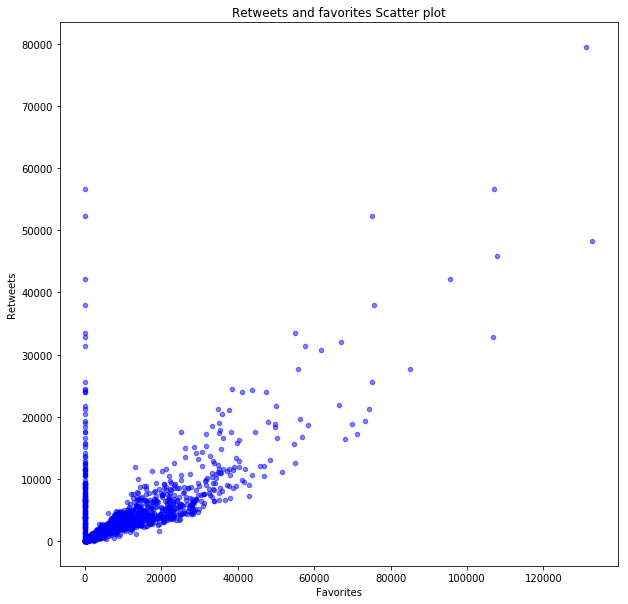

In [86]:
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'blue',figsize=(10,10))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

In [87]:
df.to_csv('twitter_archive_master_final.csv', index=False)